In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = 'AMZN'
start_date = '2018-01-01'
end_date = '2023-10-31'

In [3]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
4,2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...,...
1462,2023-10-24,127.739998,128.800003,126.339996,128.559998,128.559998,46477400
1463,2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500
1464,2023-10-26,120.629997,121.639999,118.349998,119.570000,119.570000,100419500
1465,2023-10-27,126.199997,130.020004,125.519997,127.739998,127.739998,125309300


In [4]:
data = df['Close']

scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))

In [5]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1173, 294)

In [6]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 5s 12ms/step - loss: 0.2935
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 0.2377
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1800
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.1237
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0790
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0653
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0690
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0596
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0520
Epoch 10/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0454
Epoch 11/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0361
Epoch 12/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0270
Epoch 13/200
6/6 [==============================] - 0s 6ms/s

6/6 [==============================] - 0s 8ms/step - loss: 4.6885e-04
Epoch 101/200
6/6 [==============================] - 0s 7ms/step - loss: 4.6338e-04
Epoch 102/200
6/6 [==============================] - 0s 7ms/step - loss: 4.6111e-04
Epoch 103/200
6/6 [==============================] - 0s 7ms/step - loss: 4.6071e-04
Epoch 104/200
6/6 [==============================] - 0s 7ms/step - loss: 4.6177e-04
Epoch 105/200
6/6 [==============================] - 0s 8ms/step - loss: 4.6181e-04
Epoch 106/200
6/6 [==============================] - 0s 8ms/step - loss: 4.5936e-04
Epoch 107/200
6/6 [==============================] - 0s 8ms/step - loss: 4.6153e-04
Epoch 108/200
6/6 [==============================] - 0s 7ms/step - loss: 4.5997e-04
Epoch 109/200
6/6 [==============================] - 0s 8ms/step - loss: 4.6392e-04
Epoch 110/200
6/6 [==============================] - 0s 7ms/step - loss: 4.7295e-04
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 4.6306e-04
Epoch 

6/6 [==============================] - 0s 7ms/step - loss: 4.5226e-04
Epoch 198/200
6/6 [==============================] - 0s 7ms/step - loss: 4.5096e-04
Epoch 199/200
6/6 [==============================] - 0s 7ms/step - loss: 4.5475e-04
Epoch 200/200
6/6 [==============================] - 0s 8ms/step - loss: 4.5475e-04


In [8]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [9]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [10]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 1.8445772489996901
Root Mean Squared Error (RMSE): 2.6943054820674703


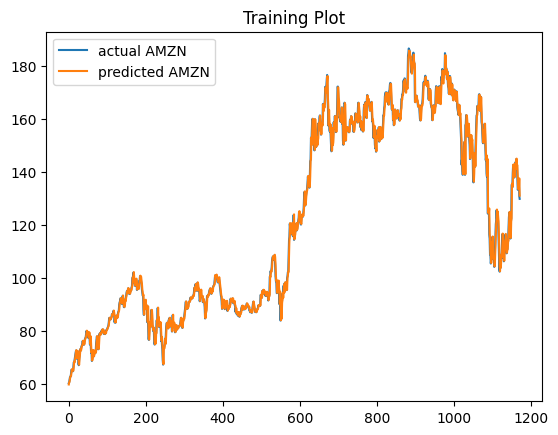

In [11]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 2.0505882237144704
Root Mean Squared Error (RMSE): 2.740466683890633


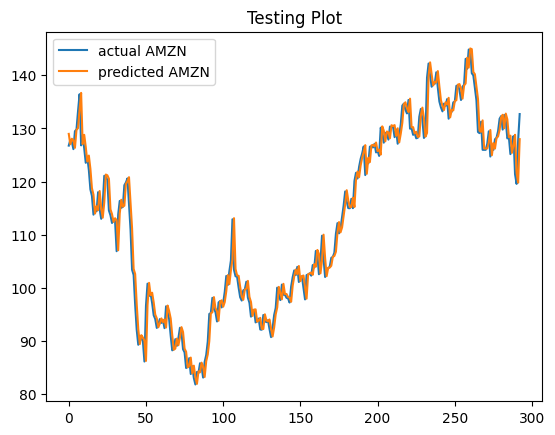

In [12]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [13]:
y_test[-1]

132.7100067138672

In [14]:
pred[-1]

array([127.98802], dtype=float32)

In [15]:
start_date = '2023-11-01'
end_date = '2023-12-08'
future_data = yf.download(ticker, start_date, end_date).reset_index()['Close']
future_data

[*********************100%***********************]  1 of 1 completed


0     137.000000
1     138.070007
2     138.600006
3     139.740005
4     142.710007
5     142.080002
6     140.600006
7     143.559998
8     142.589996
9     145.800003
10    143.199997
11    142.830002
12    145.179993
13    146.130005
14    143.899994
15    146.710007
16    146.740005
17    147.729996
18    147.029999
19    146.320007
20    146.089996
21    147.029999
22    144.839996
23    146.880005
24    144.520004
25    146.880005
Name: Close, dtype: float64

In [16]:
future_data = np.array(future_data)
len(future_data)

26

In [17]:
# model(april1) = (april2-pred) -> april2actual



# model(april2-pred) = april3-pred

In [19]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
# future_predictions = future_predictions.flatten()
type(future_predictions)

1/1 [==============================] - 0s 20ms/step


numpy.ndarray

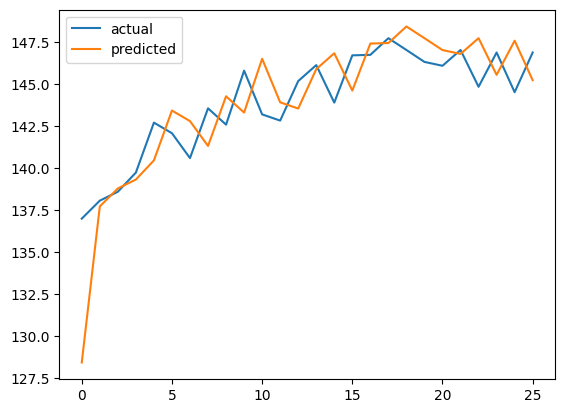

In [19]:
plt.plot(future_data, label = 'actual')
plt.plot(future_predictions, label = 'predicted')
plt.legend()
plt.show()

In [22]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [23]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)

In [24]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)

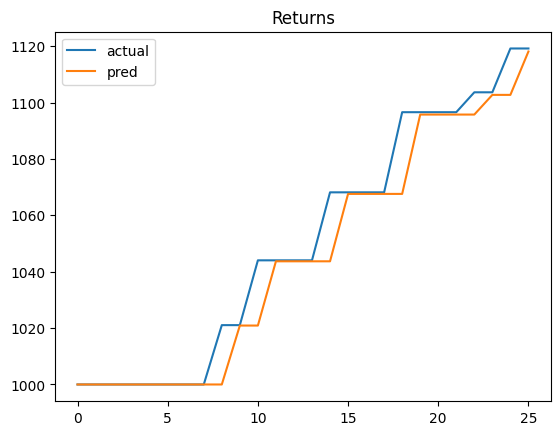

In [25]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()